<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220516_Ch9_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#9. 추천 시스텀

## 01. 추천 시스템의 개요와 배경

1. 추천 시스템의 개요

치열한 경쟁 환경에 놓여 있는 전자 상거래, 영화/음악 컨텐츠 제공 업체는 사용자의 관심을 오래 지속하기 위해 좋은 추천 시스템을 갖춰야 함을 알고 있음

2. 온라인 스토어의 필수 요소, 추천 시스템

좋은 추천 시스템은 사용자가 무엇을 원하는지 빠르게 찾아내 사용자의 온라인 쇼핑의 즐거움을 배가함. 
- 사용자가 어떤 상품을 구매했는지
- 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는지
- 사용자가 평가한 영화 평점은? 제품 평가는?
- 사용자가 스스로 작성한 자신의 취향은?

3. 추천 시스템의 유형

    1. 컨텐츠 기반 필터링content based filtering
    2. 협업 필터링collaborative filtering
        1. 최근접 이웃 협업 필터링nearest neighbor
        2. 잠재 요인 협업 필터링latent factor

##02. 컨텐츠 기반 필터링 추천 시스템

: 사용자가 특정 아이템을 매우 선호할 경우, 비슷한 컨텐츠를 가진 다른 아이템을 추천하는 방식

##03. 최근접 이웃 협업 필터링

협업 필터링: 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 가은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것

주요 목표: 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것

최근접 이웃 방식/잠재 요인 방식 모두 사용자-아이템 평점 행렬 데이터에 의지해 추천 수행

행은 개별 사용자, 열은 개별 아이템. 희소 행렬 특성을 가짐

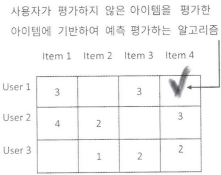

1. 최근접 이웃 협업 필터링(메모리 협업 필터링)
: 특정 사용자와 유사한 다른 사용자를 TOP-N으로 설정해 이 사용자가 좋아하는 아이템을 추천하는 방식
    * 사용자 기반(User-User): 당신과 비슷한 고객이 다음 상품도 구매했다
    * 아이템 기반(item-item): 이 상품을 선택한 다른 고객은 다음 상품도 구매했다
    

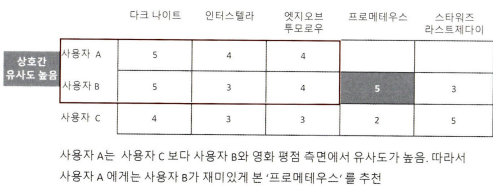

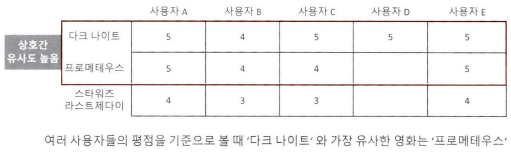

- 아이템 기반 최근접 이웃 방식: 아이템이 가지는 속성과 상관 없이 사용자가 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준

- 일반적으로 사용자 기반보다 아이템 기반 협업 필터링이 정확도가 더 높음. 
- 추천 시스템의 사용되는 데이터는 다차원 희소 행렬이라는 특징 때문에 유사도 측정을 위해 코사인 유사도를 사용.

##04. 잠재 요인 협업 필터링

: 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측하는 기법

* 행렬 분해(Matrix Factorization): 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출

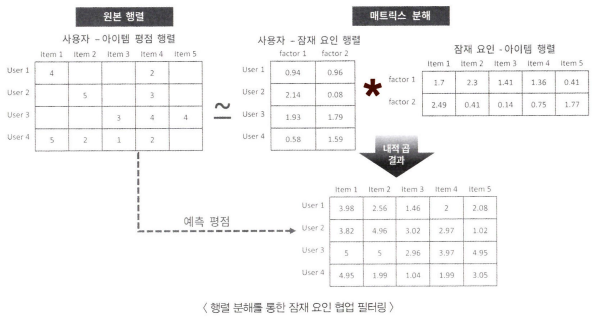

### 행렬 분해의 이해

: 다차원 행렬 -> 저차원 행렬로 분해하는 기법. SVD(Singular Vector Decomposition), NMF(Non-Negative Matrix Factorization) 등.



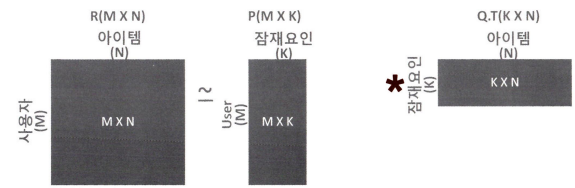

R = P*Q.T

* M: 총 사용자 수
* N: 총 아이템 수
* K: 잠재 요인의 차원 수
* R: M X N 차원의 사용자-아이템 평점 행렬
* P: 사용자와 잠재 요인과의 관계 값을 가지는 M X K 차원의 사용자-잠재 요인 행렬
* Q: 아이템과 잠재 요인과의 관계 값을 가지는 N X K 차원의 아이템-잠재 요인 행렬
* Q.T: Q의 전치 행렬

* SVD는 NaN 값이 없는 행렬에만 적용 가능
* NaN 값이 있다면 확률적 경사 하강법(SGD), ALS 방식을 이용

### 확률적 경사 하강법Stochastic Gradient Descent

: P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가지도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추하는 것

1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬 계산 후 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값 계산
3. 오류를 최소화하는 P와 Q로 업데이트
4. 2, 3 반복




L2 규제를 고려한 비용 함수식

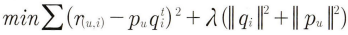

비용함수를 최소화하는 p와 q

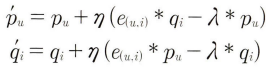

* p_u: P 행렬의 사용자 u행 벡터
* q^t_i: Q 행렬의 아이템 i행의 전치 벡터
* r_(u, i): 실제 R 행렬에 u행, i열에 위치한 값
* r^: 예측 R^ 행렬의 u행, i열에 위치한 값. p*q
* e: 실제 행렬 값과 예측 행렬 값의 차이 오류 r_(u, i)-r^_(u, i)
* η: SGD 학습률
* λ: L2 규제 계수

In [2]:
import numpy as np

#원본 행렬 R 생성, 분해 행렬 P, Q 초기화, 잠재 요인 차원 K = 3
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN,],
              [np.NaN, 5, np.NaN, 3, 1],
              [np.NaN, np.NaN, 3, 4, 4],
              [5, 2, 1, 1, np.NaN]])

num_users, num_items = R.shape
K = 3

np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [4]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    #두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R행렬 생성
    full_pred_matrix = np.dot(P, Q.T)

    #실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)

    return rmse

In [7]:
non_zeros = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

for step in range(steps):
    for i, j, r in non_zeros:
        eij = r- np.dot(P[i, :], Q[j, :].T)

        P[i, :] = P[i, :] + learning_rate*(eij * Q[j, :] - r_lambda*P[i, :])
        Q[j, :] = Q[j, :] + learning_rate*(eij * P[i, :] - r_lambda*Q[j, :])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0:
        print("### iteration step: ", step," rmse: ", rmse)
        

### iteration step:  0  rmse:  0.016604482173376314
### iteration step:  50  rmse:  0.01653768656013657
### iteration step:  100  rmse:  0.0164728033866072
### iteration step:  150  rmse:  0.016409746657734085
### iteration step:  200  rmse:  0.01634844257561078
### iteration step:  250  rmse:  0.016288824815128437
### iteration step:  300  rmse:  0.016230832099682582
### iteration step:  350  rmse:  0.016174406918077384
### iteration step:  400  rmse:  0.016119494814995958
### iteration step:  450  rmse:  0.016066043973135963
### iteration step:  500  rmse:  0.016014004945672154
### iteration step:  550  rmse:  0.0159633304677086
### iteration step:  600  rmse:  0.01591397531057656
### iteration step:  650  rmse:  0.015865896160572695
### iteration step:  700  rmse:  0.015819051512699675
### iteration step:  750  rmse:  0.01577340157452596
### iteration step:  800  rmse:  0.015728908177566545
### iteration step:  850  rmse:  0.015685534694757114
### iteration step:  900  rmse:  0.0156

In [8]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬: \n', np.round(pred_matrix, 3))

예측 행렬: 
 [[3.992 1.27  1.524 1.997 1.693]
 [7.081 4.978 1.639 2.982 1.004]
 [5.312 0.762 2.989 3.98  3.985]
 [4.971 2.005 1.    1.019 0.514]]
